# Project 1

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


In [6]:
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline

##### 1. What does the data describe?

The data shows each state's verbal and math SAT scores, as well as the participation rate.

##### 2. Does the data look complete? Are there any obvious issues with the observations?

There do not appear to be any issues, although there is a row that shows the average participation rates and scores across all states. Each data contains the expected number of data points, and each numerical column can be successfully converted.

##### 3. Create a data dictionary for the dataset.

In [7]:
# Import data from csv file as a list object
data_from_csv = []
file_path = "/Users/Nathan/DSI-course-materials/curriculum/03-projects/01-projects-weekly/project-01/assets/sat_scores.csv"
with open(file_path, 'r') as f:
    read_file = csv.reader(f)
    for row in read_file:
        data_from_csv.append(row)

# Convert data to an array and transpose it, yielding rows with the form ['Data header', Data ...]
data_from_csv_as_array = np.array(data_from_csv)
data_from_csv_as_array = data_from_csv_as_array.T
data_from_csv_as_rows = data_from_csv_as_array.tolist()

# Create the data dictionary
dictionary_of_data = {}
for row in data_from_csv_as_rows:
    dictionary_of_data[row[0]] = row[1:]

# Print the dictionary
for key in dictionary_of_data:
    print(key, dictionary_of_data[key], '\n')

Math ['510', '513', '515', '505', '516', '499', '499', '506', '500', '501', '499', '510', '499', '489', '501', '488', '474', '526', '499', '527', '499', '515', '510', '517', '525', '515', '542', '439', '539', '512', '542', '553', '542', '589', '550', '545', '572', '589', '580', '554', '568', '561', '577', '562', '596', '550', '570', '603', '582', '599', '551', '514'] 

State ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'] 

Verbal ['509', '499', '511', '495', '520', '501', '500', '511', '506', '510', '501', '508', '493', '491', '499', '486', '482', '526', '498', '527', '493', '485', '514', '498', '523', '509', '539', '534', '539', '527', '543', '562', '551', '576', '550', '547', '561', '580', '577', '559', '562', '567', '577

## Step 2: Load the data.

##### 4. Load the data into a list of lists

In [8]:
# Import data from csv file as a list object
data_from_csv = []
file_path = "/Users/Nathan/DSI-course-materials/curriculum/03-projects/01-projects-weekly/project-01/assets/sat_scores.csv"
with open(file_path, 'r') as f:
    read_file = csv.reader(f)
    for row in read_file:
        data_from_csv.append(row)

##### 5. Print the data

In [9]:
print(data_from_csv)

[['State', 'Rate', 'Verbal', 'Math'], ['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12

##### 6. Extract a list of the labels from the data, and remove them from the data.

In [10]:
headers = data_from_csv[0]
data = data_from_csv[1:-1]

##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [11]:
state_names = [row[0] for row in data]
print(state_names)

['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']


##### 8. Print the types of each column

In [12]:
def print_data_types(data_set):
    # Create a dictionary to store a set of data types for each column
    data_types_dictionary = dict().fromkeys(headers, set())

    # For each column, examine the corresponding row element
    for i, key in enumerate(data_types_dictionary):
 
        for row in data_set:
    
            # Add each element's data type to the set, which keeps only unique values
            data_types_dictionary[key].add(type(row[i]))

        # Print the set of data types for each column
        print(key, ':', data_types_dictionary[key])
        
print_data_types(data)

Math : {<class 'str'>}
State : {<class 'str'>}
Verbal : {<class 'str'>}
Rate : {<class 'str'>}


This means that each column contains only strings.

##### 9. Do any types need to be reassigned? If so, go ahead and do it.

In [13]:
# The Rate, Verbal and Math columns need to be reassigned

for column_index, header in enumerate(headers):
    if header != 'State':
        for row in data:
            row[column_index] = int(row[column_index])
            
# Verify the values converted correctly
print_data_types(data)

Math : {<class 'str'>}
State : {<class 'str'>, <class 'int'>}
Verbal : {<class 'str'>, <class 'int'>}
Rate : {<class 'str'>, <class 'int'>}


##### 10. Create a dictionary for each column mapping the State to its respective value for that column. 

In [14]:
# For easy iteration, convert the data to a dictionary with the format:
#   {'Rate': {State_name: Rate_for_state, ...}, ...}
data_by_state_dictionary = dict()

# Iterate over each header name in headers. Limit to specific categories
for column_index, header_name in enumerate(headers):
    if header_name != 'State':
        data_by_state_dictionary[header_name] = dict()

        # Look at each row in the data
        for row in data:
        
            # Set the data value for each state key in the data_dictionary
            # Ex. Rate: {State_name: row[Header_column_index]}
            data_by_state_dictionary[header_name][row[0]] = row[column_index]

##### 11. Create a dictionary with the values for each of the numeric columns

In [15]:
dictionary_of_columns = dict()
for column_index, header in enumerate(headers):
    if header != 'State':
        dictionary_of_columns[header] = []
        for row in data:
            dictionary_of_columns[header].append(row[column_index])

## Step 3: Describe the data

##### 12. Print the min and max of each column

In [16]:
for column in dictionary_of_columns:
    print("{} \n  Min: {}, Max: {}".format(column, min(dictionary_of_columns[column]), max(dictionary_of_columns[column])))

Math 
  Min: 439, Max: 603
Verbal 
  Min: 482, Max: 593
Rate 
  Min: 4, Max: 82


##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [17]:
def find_std_dev(data_list):
    mean = np.mean(data_list)
    sum_squares = sum((data_list - mean) ** 2)
    variance = sum_squares / len(data_list)
    
    return(np.sqrt(variance))

print("Using find_std_dev():")
for column in dictionary_of_columns:
    print("  {}: {}" .format(column, find_std_dev(dictionary_of_columns[column])))
    
print("\nUsing numpy.std():")
for column in dictionary_of_columns:
    print("  {}: {}" .format(column, np.std(dictionary_of_columns[column])))

Using find_std_dev():
  Math: 35.92987317311408
  Verbal: 33.03198268415228
  Rate: 27.27923867605359

Using numpy.std():
  Math: 35.92987317311408
  Verbal: 33.03198268415228
  Rate: 27.27923867605359


## Step 4: Visualize the data

##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

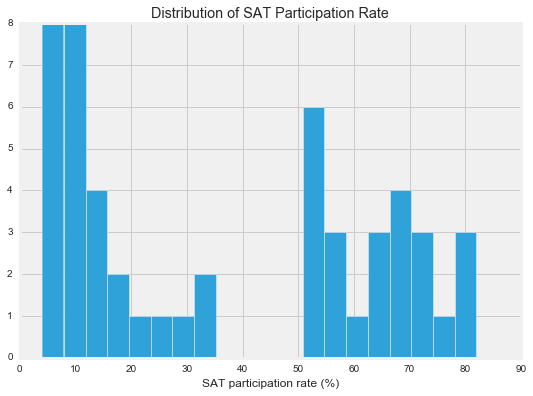

In [18]:
fig = plt.figure(figsize = (8,6))
ax_rate = fig.add_subplot(1,1,1)

ax_rate.set_title("Distribution of SAT Participation Rate")
ax_rate.hist(x = dictionary_of_columns['Rate'], bins = 20)
ax_rate.set_xlabel("SAT participation rate (%)")


plt.show()

##### 15. Plot the Math distribution

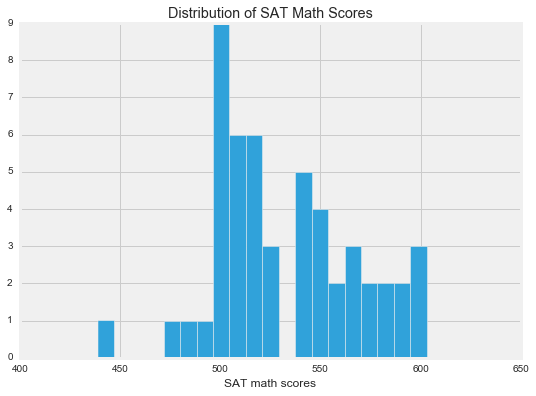

In [19]:
fig = plt.figure(figsize = (8,6))
ax_math = fig.add_subplot(1,1,1)

ax_math.set_title("Distribution of SAT Math Scores")
ax_math.hist(x = dictionary_of_columns['Math'], bins = 20)
ax_math.set_xlabel("SAT math scores")

plt.show()

##### 16. Plot the Verbal distribution

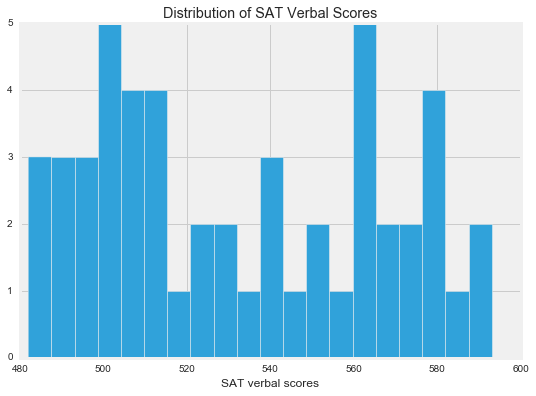

In [20]:
fig = plt.figure(figsize = (8,6))
ax_verbal = fig.add_subplot(1,1,1)

ax_verbal.set_title("Distribution of SAT Verbal Scores")
ax_verbal.hist(x = dictionary_of_columns['Verbal'], bins = 20)
ax_verbal.set_xlabel("SAT verbal scores")

plt.show()

##### 17. What is the typical assumption for data distribution?

Data is typically assumed to follow a normal distribution, which has only one local maxima.

##### 18. Does that distribution hold true for our data?

Our data appears to be bimodal.

##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

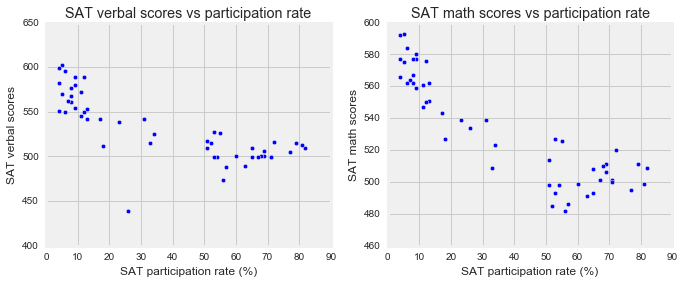

In [31]:
fig = plt.figure(figsize = (10,4))
ax_verbal_scores_vs_rates = fig.add_subplot(1,2,1)
ax_math_scores_vs_rates = fig.add_subplot(1,2,2)

ax_verbal_scores_vs_rates.scatter(x = dictionary_of_columns['Rate'], y = dictionary_of_columns['Math'])
ax_math_scores_vs_rates.scatter(x = dictionary_of_columns['Rate'], y = dictionary_of_columns['Verbal'])

ax_verbal_scores_vs_rates.set_title("SAT verbal scores vs participation rate")
ax_math_scores_vs_rates.set_title("SAT math scores vs participation rate")

ax_verbal_scores_vs_rates.set_xlabel("SAT participation rate (%)")
ax_math_scores_vs_rates.set_xlabel("SAT participation rate (%)")

ax_verbal_scores_vs_rates.set_ylabel("SAT verbal scores")
ax_math_scores_vs_rates.set_ylabel("SAT math scores")

plt.show()

##### 20. Are there any interesting relationships to note?

The SAT participation rate distribution shows that high schools may be divided into high– and low-participation rate groups. More research is needed to determine the cause; for instance, some state education boards may emphasize standardize testing to its students; alternatively, some states may have lower matriculation rates, which would correlate with low participation in the SAT exams.


##### 21. Create box plots for each variable. 

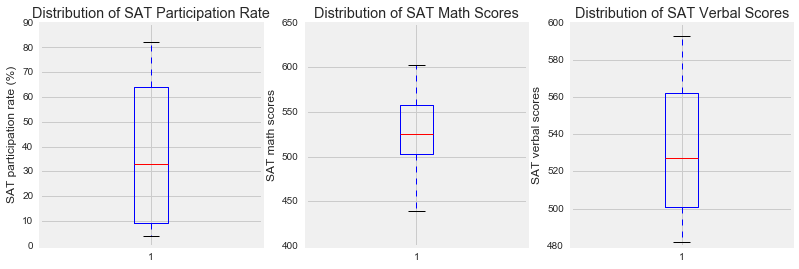

In [23]:
fig = plt.figure(figsize = (12,4))
ax_rate = fig.add_subplot(1,3,1)
ax_math = fig.add_subplot(1,3,2)
ax_verbal = fig.add_subplot(1,3,3)

ax_rate.set_title("Distribution of SAT Participation Rate")
ax_rate.boxplot(dictionary_of_columns['Rate'])
ax_rate.set_ylabel("SAT participation rate (%)")

ax_math.set_title("Distribution of SAT Math Scores")
ax_math.boxplot(dictionary_of_columns['Math'])
ax_math.set_ylabel("SAT math scores")

ax_verbal.set_title("Distribution of SAT Verbal Scores")
ax_verbal.boxplot(dictionary_of_columns['Verbal'])
ax_verbal.set_ylabel("SAT verbal scores")

plt.show()

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 